## Separa os dados em treino e teste, treina o modelo, faz os testes, verifica os resultados, faz os ajustes necessários e avalia se o modelo pode ser usado para predizer o preço de imóveis.

In [1]:
# importa bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', None) # permite exibição de todas as linhas
pd.set_option('display.max_columns', None) # permite exibição de todas as colunas
import warnings
warnings.simplefilter('ignore') # inibe avisos de warning

In [2]:
# le os dados do dataset tratado recebendo em formato de dataframe
dfx = pd.read_csv('arquivos_tratados/df_housePriceIndia.csv')

In [3]:
# verificando se todos os dados foram carregados
dfx.shape

(365, 7)

In [4]:
# verifica as colunas e linhas carregadas
dfx.head(3)

,Data,temp_media,temp_min,temp_max,precip_mm,fim_semana,cons_litros
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814


In [5]:
# separa as variáveis: dependente_y e independentes_x
# as variáveis independentes (x) são separadas da variável dependente (y) em dataframes diferentes
Xi = dfx[["temp_media", "temp_max", 'fim_semana']]
yi = dfx[['cons_litros']]

In [6]:
# verifica o Dtype das variáveis independentes
print(Xi.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp_media  365 non-null    float64
 1   temp_max    365 non-null    float64
 2   fim_semana  365 non-null    float64
dtypes: float64(3)
memory usage: 8.7 KB
None


In [7]:
# Faz a separação dos dados de treino X_train e y_train e de teste X_test e y_test
Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, test_size=0.30, train_size=0.70, random_state=2)

In [8]:
# Criando a arquitetura da rede neural:
k_model = Sequential() # cria o modelo

k_model.add(Dense(units=5, # inclui uma camada intermediária com 5 neurônios
                 activation='relu', # função de ativação
                 input_dim=Xi_train.shape[1])) # passa a dimensão do df xi_train

k_model.add(Dense(units=1, # inclui a camada de saída com 1 neurônio apenas (temos 1 variável de saída)
                 activation='linear')) # função de ativação

In [9]:
# compila o modelo:
k_model.compile(loss='mse', # função de perda/custo, ajuda a minimizar o erro, diferença do previsto e calculado
                            # mse(erro quadrático médio) mede a quantidade de erros
                optimizer='adam', # otimização de adam, ajuda a aprender com eficiência e convergir para soluções
                                  # ideais
                metrics=['mae']) # métricas a serem avaliadas, mae(erro médio absoluto)

In [10]:
# treina a rede neural:
resultado = k_model.fit(Xi_train, yi_train, # dados de treino
                       epochs=200, # determina quantas vezes o modelo passará pelo conjunto de treinamento 
                                   # xi_train e yi_train
                       batch_size=32, # determina o nro de exemplos(linhas) contido no conjunto de treinamento, que
                                      # será utilizado de uma vez para atualizar os pesos antes de prosseguir com 
                                      # o treinamento
                       validation_data=(Xi_test, yi_test)) # ajuda a achar o ponto ideal do treinamento evitando
                                                           # overfit e underfit 

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 449.2973 - mae: 20.8282 - val_loss: 403.3360 - val_mae: 19.7343
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 391.0151 - mae: 19.4052 - val_loss: 353.9609 - val_mae: 18.4638
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 343.9868 - mae: 18.1880 - val_loss: 308.9037 - val_mae: 17.2224
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 306.6523 - mae: 17.1219 - val_loss: 268.1837 - val_mae: 16.0176
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 256.5008 - mae: 15.5951 - val_loss: 232.1051 - val_mae: 14.8677
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 227.7751 - mae: 14.7339 - val_loss: 203.0745 - val_mae: 13.8608
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 197.5176 - mae: 13.6280 - val_loss: 181.5744 - val_mae: 13.0746
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 178.3674 - mae: 12.9227 - val_loss: 162.4420 - val_mae: 12.3330
Epoch 9/200
8/8 ━━━━━━━━

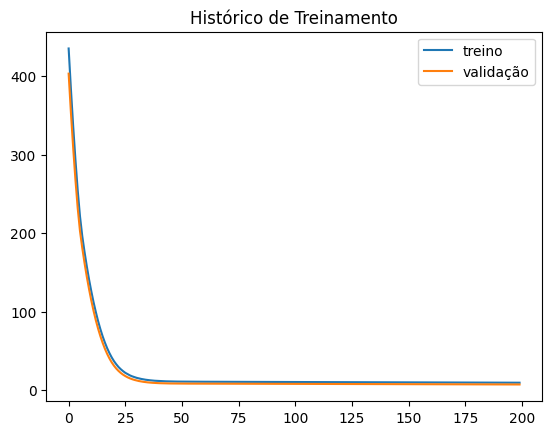

In [11]:
# Plotando gráfico do histórico de treinamento, verificando o erro de treino e de teste
plt.plot(resultado.history["loss"], label="loss")
plt.plot(resultado.history["val_loss"], label="val_loss")
plt.title('Histórico de Treinamento')
plt.legend(['treino', 'validação'])
plt.show()

In [12]:
# o df de teste tem 3 colunas (variáveis independentes)
Xi_test.shape

(110, 3)

In [13]:
# fazendo uma predição com os dados de teste
# será feito uma predição para cada linha do xi_test na mesma unidade de cons_litros
xi_teste_pred = k_model.predict(Xi_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [14]:
# exibe o array com o resultado da predição
xi_teste_pred

array([[21.824966],
       [19.21876 ],
       [26.282898],
       [16.518276],
       [20.072973],
       [26.594109],
       [23.709913],
       [18.009705],
       [19.120762],
       [28.301483],
       [24.821499],
       [30.290117],
       [29.81645 ],
       [27.319326],
       [25.051163],
       [30.323437],
       [26.888973],
       [26.326744],
       [27.398027],
       [28.646545],
       [21.038584],
       [22.604778],
       [25.013456],
       [23.956549],
       [23.21752 ],
       [26.733633],
       [19.183683],
       [25.564388],
       [26.12615 ],
       [23.726885],
       [29.610815],
       [18.859531],
       [27.581745],
       [30.49519 ],
       [26.090319],
       [20.239498],
       [24.325735],
       [16.966164],
       [25.21822 ],
       [30.09763 ],
       [21.616795],
       [29.145079],
       [34.88418 ],
       [24.354134],
       [24.709473],
       [28.300255],
       [16.632719],
       [26.579205],
       [19.313557],
       [21.614733],


In [15]:
# salva o modelo de árvore de decisão (faz o deploy)
# o modelo treinado e aprovado, agora é salvo em um arquivo pkl para ser utilizado em futuras aplicações
joblib.dump(xi_teste_pred, "modelos/consumo_cerveja_keras_model.pkl")

['modelos/consumo_cerveja_keras_model.pkl']